# Xiaobo He <font color='blue'> Score: 23/24 </font>

#### <font color='blue'> Please see the corresponding cells for comments (in blue) on each individual question, if there's any. </font>

# MTH9879 Homework 7

Assigned: March 29, 2016.
Due: April 12, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points) <font color=blue> Score: 5/6 </font>

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

### Solution
$$
\begin{eqnarray}
    \Var[X_{t+\tau} - X_t] = \Var[\sum_{i = t+1}^{t + \tau} \epsilon_i]
    = \tau + \sum_{i\neq j}^{\tau} \E[\epsilon_{t+i} \epsilon_{t+j}]
    &\sim& \tau + 2 \sum_{i > j}^{\tau} (i-j)^{-\alpha}
    = \tau + 2 \sum_{k=1}^{\tau-1} k^{1-\alpha}
    &\approx& \tau + \frac {2} {2-\tau} \cdot ( {(\tau-1)}^{2-\alpha} - 1) 
    &\sim& \tau ^ {2-\alpha}
\end{eqnarray}
$$

Since $ H=1-\frac{\alpha}{2} $, we have
$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

<font color=blue>(1pt off) Unclear to me why $\sum_{i > j}^{\tau} (i-j)^{-\alpha}
    = \sum_{k=1}^{\tau-1} k^{1-\alpha}$, more details required. 

## MSFT data from Alejandro Ca&ntilde;ete

In [2]:
library(highfrequency)
library(xts)
library(zoo)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

### 2. (10 points) <font color=blue> Score: 10/10 </font>

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


### Solution


In [3]:
# (a) Generate the series tradeSign of trade signs from the msft130311.inet data frame
tradeSign <- sign(msft130311.inet$signed.shares)

head(tradeSign)

[1] -1  1  1  1  1 -1

In [4]:
# (b) Fit an AR(1) model 
ar1 <- ar(tradeSign, aic = FALSE, order.max = 1, demean = F)
forecast <- tradeSign * ar1$ar
ar(tradeSign, aic = FALSE, order.max = 1, demean = F)


Call:
ar(x = tradeSign, aic = FALSE, order.max = 1, demean = F)

Coefficients:
     1  
0.8223  

Order selected 1  sigma^2 estimated as  0.3238


Autocorrelations of series ‘tradeSign’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.821 0.712 0.643 0.591 0.552 0.518 0.491 0.474 0.455 0.434 0.419 0.403 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.395 0.387 0.375 0.364 0.352 0.340 0.331 0.324 0.310 0.300 0.293 0.285 0.279 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.275 0.270 0.265 0.257 0.250 0.246 0.241 0.230 0.217 0.207 0.202 0.200 0.199 
   39    40    41    42 
0.193 0.189 0.180 0.175 
[1] 0.8223315 0.6762292 0.5560846 0.4572859 0.3760406 0.3092301
[1] 0.3238112


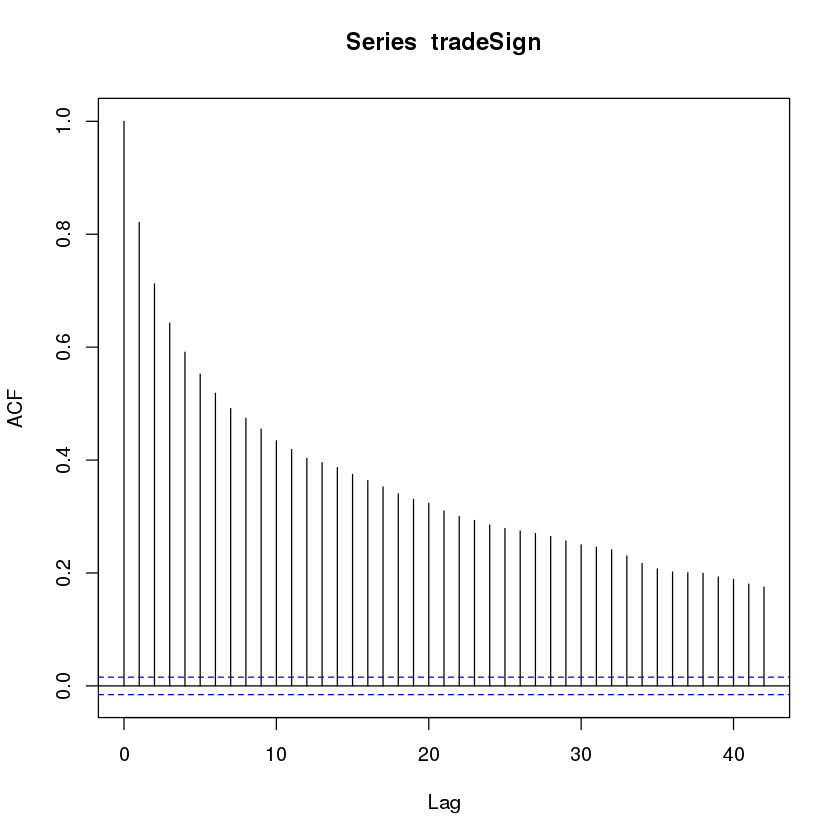

In [5]:
# (c) How does ϕ1 relate to the autocorrelation coefficients of tradeSign? 
#     What is the mean-squared error of this AR(1) forecast?
rho_trading_sign <- acf(tradeSign)
phi_k <- sapply(1:6,function(q){(ar1$ar)^q})
print(rho_trading_sign)
print(phi_k)
mse <- ar1$var.pred
print(mse)

$\phi_1$ equals to the first order autocorrelation coefficient of *tradeSign*. 

The mean-squared error is 0.3238.

In [6]:
# (d) Fit an AR(p) model to the tradeSign data
arp <- ar(tradeSign, aic = TRUE, demean = F)
print(arp)


Call:
ar(x = tradeSign, aic = TRUE, demean = F)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6958   0.0372   0.0417   0.0183   0.0234   0.0044  -0.0005   0.0298  
      9       10       11       12       13       14       15       16  
 0.0107  -0.0083   0.0145  -0.0140   0.0225   0.0121  -0.0005   0.0057  
     17       18       19       20  
 0.0047  -0.0043   0.0003   0.0165  

Order selected 20  sigma^2 estimated as  0.3116


In [7]:
# (e) What value of p is selected by R? What is the mean-squared error of this AR(p) forecast?
cat("\n\nThe valud of p selected by R:  ", arp$order )
cat("\nThe mean squared error of the AR(p) forecast:  ", arp$var.pred)



The valud of p selected by R:   20
The mean squared error of the AR(p) forecast:   0.3115532

<font color=blue> For some reason, if demean allowed, the order selected becomes 14 while MSE stays roughly the same. See the code below. 

In [8]:
ar(tradeSign)


Call:
ar(x = tradeSign)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6962   0.0375   0.0422   0.0186   0.0236   0.0048   0.0002   0.0302  
      9       10       11       12       13       14  
 0.0112  -0.0080   0.0154  -0.0127   0.0237   0.0199  

Order selected 14  sigma^2 estimated as  0.3116

### 3. (8 points) <font color=blue> Score: 8/8 </font>

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

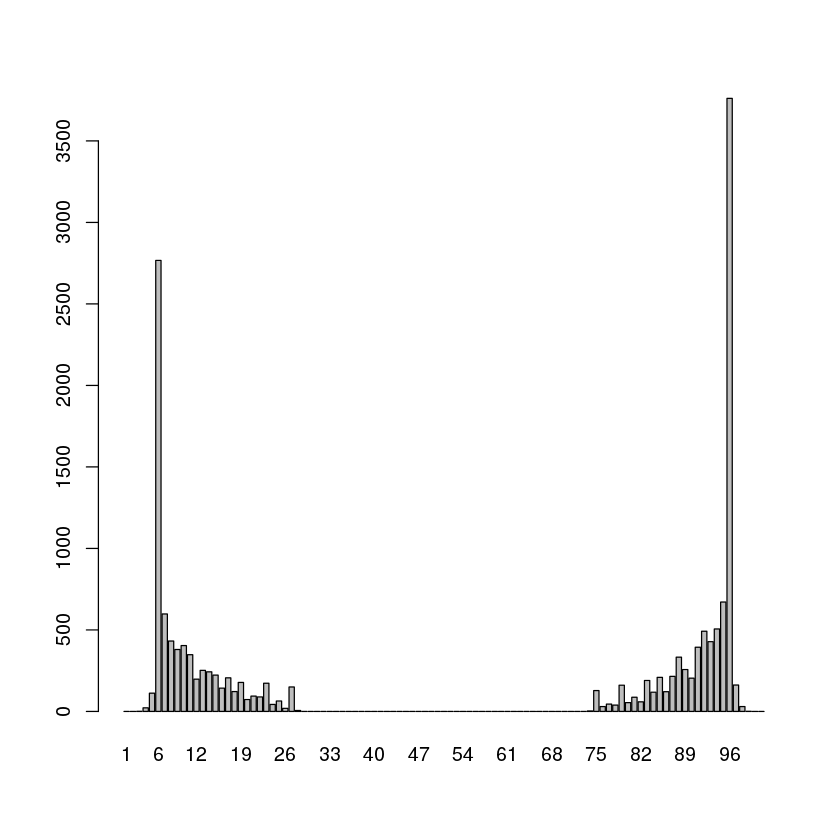

In [9]:
# (a) 
num_order <- arp$ar
nn <- length(tradeSign) - arp$order

p_forecast <- sapply(1:nn, function(i)(rev(num_order) %*% tradeSign[i:(i+arp$order -1)]))
    
bin <- c(1:101)
data <- cut(p_forecast, breaks=seq(-1.01, 1.01, by=0.02), labels = bin)
plot(data)



Call:
lm(formula = avgActualSign ~ avgForecastSign + 0)

Coefficients:
avgForecastSign  
         0.9863  


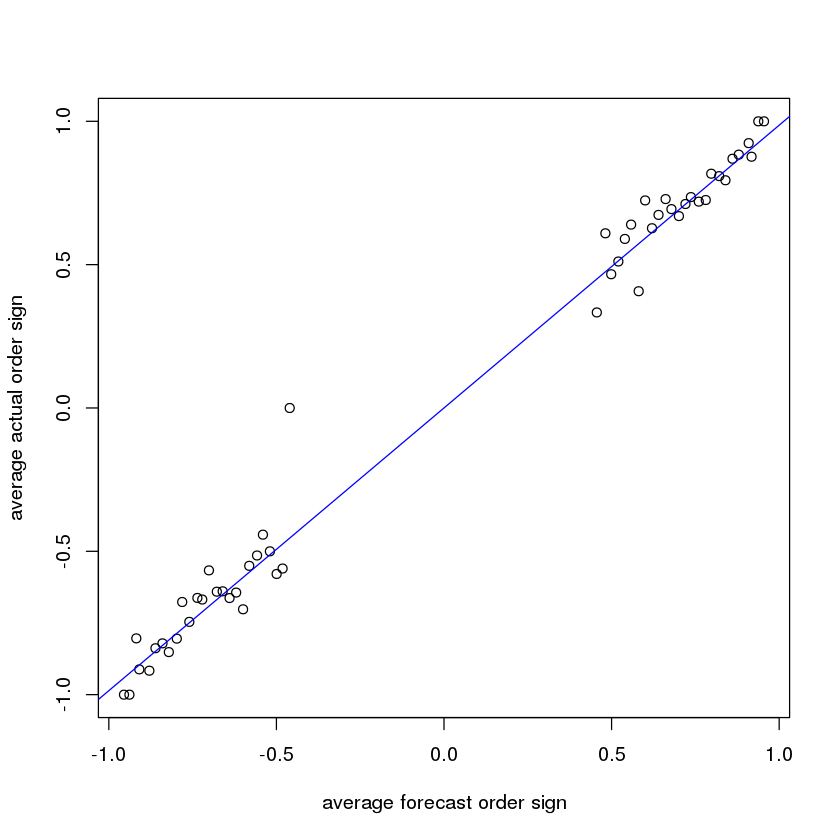

In [10]:
#(b) Plot the average actual order sign in each bin against the average forecast order sign

avgForecastSign <- sapply(bin, function(bin) {mean(p_forecast[which(data == bin)])})

p_actual <- tradeSign[(arp$order+1):length(tradeSign)]
avgActualSign <- sapply(bin, function(bin) {mean(p_actual[which(data == bin)])})

plot(avgForecastSign, avgActualSign, xlab="average forecast order sign", ylab="average actual order sign")

regression <- lm(avgActualSign~avgForecastSign+0)
regression
abline(regression, col = 'blue')

In [11]:
cat("The slope of the resulting graph is: ", regression$coefficients[[1]])

The slope of the resulting graph is:  0.986333

### (c)
Suppose the probablity of next order to be a market buy is $p$, from the regression model the actual order sign is $\hat\epsilon \cdot r$, where $r$ is the slope of regression from part B. Then we have
$$
\hat \epsilon \cdot r = p\cdot 1+(1-p)\cdot (-1) \\
$$

Solve for $p$. we get
$$
p=\frac{\hat \epsilon \cdot r+1}{2} = \frac{0.986333 *\hat \epsilon +1}{2}
$$


